In [113]:
import nltk
import pandas as pd
import re 
import numpy as np
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.convolutional import Conv1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
movie_reviews = pd.read_csv("C:\\Users\\smita\\Desktop\\Aegis School of Data Science\\Machine Learning Project Session\\imdb-dataset-of-50k-movie-reviews (1)\\IMDB Dataset.csv")

movie_reviews.isnull().values.any()

movie_reviews.shape

(50000, 2)

In [115]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [116]:
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

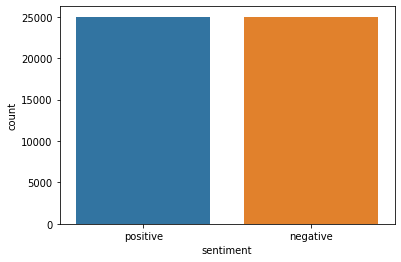

In [117]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews)

In [118]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [119]:
import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [120]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [121]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [122]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [124]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [125]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [126]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('C:\\Users\\smita\\Desktop\\Aegis School of Data Science\\Machine Learning Project Session\\9557_13623_compressed_glove.6B.100d.txt\\glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [127]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector    

In [ ]:
#snn

In [128]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [129]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          9254700   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 10001     
Total params: 9,264,701
Trainable params: 10,001
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [130]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 2s 59us/step - loss: 0.5996 - acc: 0.6724 - val_loss: 0.5989 - val_acc: 0.6806
Epoch 2/6
32000/32000 [==============================] - 2s 56us/step - loss: 0.4936 - acc: 0.7628 - val_loss: 0.5189 - val_acc: 0.7391
Epoch 3/6
32000/32000 [==============================] - 2s 57us/step - loss: 0.4647 - acc: 0.7797 - val_loss: 0.5174 - val_acc: 0.7436
Epoch 4/6
32000/32000 [==============================] - 2s 61us/step - loss: 0.4345 - acc: 0.8000 - val_loss: 0.5220 - val_acc: 0.7431
Epoch 5/6
32000/32000 [==============================] - 2s 54us/step - loss: 0.4229 - acc: 0.8064 - val_loss: 0.5348 - val_acc: 0.7385
Epoch 6/6
32000/32000 [==============================] - 2s 53us/step - loss: 0.4075 - acc: 0.8163 - val_loss: 0.5299 - val_acc: 0.7450


In [131]:
score = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 59us/step


In [132]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5327342233180999
Test Accuracy: 0.7434999942779541


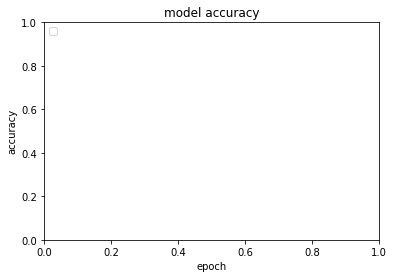

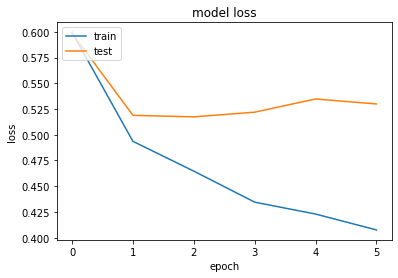

In [133]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#Recurrent Neural Network (LSTM)

In [134]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [135]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          9254700   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 9,318,957
Trainable params: 64,257
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [136]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 19s 600us/step - loss: 0.5020 - acc: 0.7536 - val_loss: 0.3998 - val_acc: 0.8173
Epoch 2/6
32000/32000 [==============================] - 21s 642us/step - loss: 0.3708 - acc: 0.8358 - val_loss: 0.3732 - val_acc: 0.8309
Epoch 3/6
32000/32000 [==============================] - 21s 662us/step - loss: 0.3214 - acc: 0.8646 - val_loss: 0.4171 - val_acc: 0.8052
Epoch 4/6
32000/32000 [==============================] - 21s 653us/step - loss: 0.2820 - acc: 0.8870 - val_loss: 0.3857 - val_acc: 0.8260
Epoch 5/6
32000/32000 [==============================] - 20s 625us/step - loss: 0.2500 - acc: 0.9034 - val_loss: 0.3501 - val_acc: 0.8454
Epoch 6/6
10000/10000 [==============================] - 3s 251us/step


In [137]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.35246791200637817
Test Accuracy: 0.8464000225067139


In [138]:
#If you compare the training and test accuracy, you will see that the training accuracy for CNN will be around 92%, which 
#is greater than the training accuracy of the simple neural network. The test accuracy is around 82% for the CNN, which is 
#also greater than the test accuracy for the simple neural network, which was around 74%.

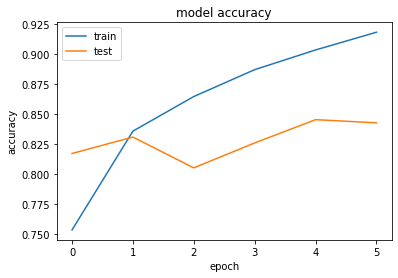

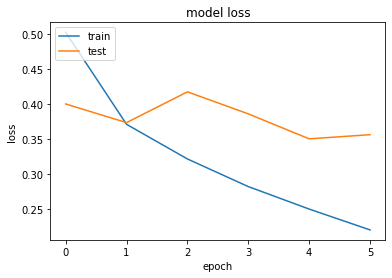

In [139]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [ ]:
#Making Predictions on Single Instance

In [140]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [141]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 100)          9254700   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 9,372,077
Trainable params: 117,377
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [142]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 82s 3ms/step - loss: 0.5421 - acc: 0.7225 - val_loss: 0.4437 - val_acc: 0.7965
Epoch 2/6
32000/32000 [==============================] - 79s 2ms/step - loss: 0.4426 - acc: 0.7944 - val_loss: 0.4405 - val_acc: 0.7905
Epoch 3/6
32000/32000 [==============================] - 80s 3ms/step - loss: 0.3952 - acc: 0.8212 - val_loss: 0.3721 - val_acc: 0.8389
Epoch 4/6
32000/32000 [==============================] - 91s 3ms/step - loss: 0.3666 - acc: 0.8370 - val_loss: 0.3592 - val_acc: 0.8445
Epoch 5/6
32000/32000 [==============================] - 84s 3ms/step - loss: 0.3413 - acc: 0.8490 - val_loss: 0.3413 - val_acc: 0.8494
Epoch 6/6
10000/10000 [==============================] - 16s 2ms/step


In [143]:
# The script above trains the model on the test set. The batch size is 128, whereas the number of epochs is 6. At the end of
# the training, you will see that the training accuracy is around 85.40%.

In [144]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.35482274782657625
Test Accuracy: 0.8414999842643738


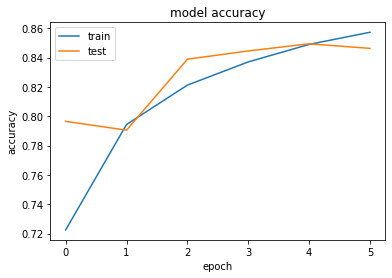

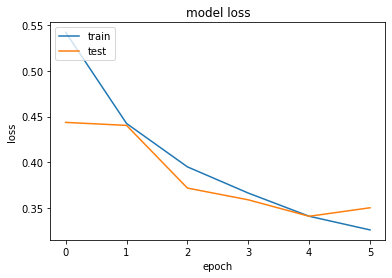

In [145]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#Making Predictions on Single Instance

In [146]:
instance = X[57]
print(instance)

I laughed all the way through this rotten movie It so unbelievable woman leaves her husband after many years of marriage has breakdown in front of real estate office What happens The office manager comes outside and offers her job Hilarious Next thing you know the two women are going at it Yep they re lesbians Nothing rings true in this Lifetime for Women with nothing better to do movie Clunky dialogue like don want to spend the rest of my life feeling like had chance to be happy and didn take it doesn help There a wealthy distant mother who disapproves of her daughter new relationship sassy black maid unbelievable that in the year film gets made in which there a sassy black maid Hattie McDaniel must be turning in her grave The woman has husband who freaks out and wants custody of the snotty teenage kids Sheesh No cliche is left unturned 


In [147]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[0.6549284]], dtype=float32)

In [ ]:
#we mapped the positive outputs to 1 and the negative outputs to 0. However, the sigmoid function predicts floating value 
#between 0 and 1. If the value is less than 0.5, the sentiment is considered negative where as if the value is greater than 0.5,
#the sentiment is considered as positive. The sentiment value for our single instance is 0.33 which means that our sentiment 
#is predicted as negative, which actually is the case.